<a href="https://colab.research.google.com/github/KashifaSadiya/Machine-Learning-Project/blob/main/CustomerConversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statistics as st

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
pd.set_option('display.max_columns', None)
df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# **Data Cleaning**


In [ ]:
df.shape
#df['age'].unique()

(45211, 11)

In [ ]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
#df = df.drop_duplicates()
#df.shape

In [ ]:
df['job'].unique()
#df['job'].value_counts()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
#df['job']= df['job'].replace('unknown',df['job'].mode()[0])

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['education_qual'].unique()
#df['education_qual'].value_counts()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
#df['education_qual'].isnull().sum()
#df.isnull().sum()
#df['educatiion_qual']= df['education_qual'].replace('unknown',df['education_qual'].mode()[0])
#df['education_qual'].value_counts()

In [ ]:
df['call_type'].unique()
#df['call_type'].value_counts()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['dur'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [ ]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df['prev_outcome'].unique()
#df['prev_outcome'].value_counts()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

# **Dropping Duplicate Data**

In [ ]:
df = df. drop_duplicates()



*   There are some missing values in the name of "unknown" where ever this unknown values are less their we consider it as missing values.
*   In "job" and "education_qual" the unknown values values are less and considering them as outliers imputing them with mode().


# **Converting unknown values using with Mode**

In [ ]:
df['job'].value_counts()                  

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64



 Totally 288 unknown values present in job replacing the unknown values using mode



In [ ]:
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])

<ipython-input-21-d0b186ce13bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].replace('unknown', df['job'].mode()[0])


In [ ]:
df['job'].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

Totally 1857 unknown values present in education_qual replacing the unknown values using mode

In [ ]:
df['education_qual'] = df['education_qual'].replace("unknown",df['education_qual'].mode()[0])

In [ ]:
df['education_qual'].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [ ]:
df['education_qual'] = df['education_qual'].fillna('secondary')

In [ ]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [ ]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [ ]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64



Checking if there is any Null values in Month



In [ ]:
df['mon'].isnull().sum()

0

In [ ]:
df['num_calls'].value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [ ]:
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64



Checking if there is any null values in the data frame through out all the columns



In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.shape

(45205, 11)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000




*   For detecting the Outliers using "InterQuartile Range"
*   For correcting the data using "Clipping Method"



# **InterQuartile Range:** The Range of values that resides in the middle of scores.

In [ ]:
IQR = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
UL = df['dur'].quantile(0.75)+(1.5*IQR)
LL = df['dur'].quantile(0.25)-(1.5*IQR)
UL,LL

(643.0, -221.0)

In [ ]:
df['dur'] = df.dur.clip(LL,UL)

In [ ]:
IQR = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
UL = df['num_calls'].quantile(0.75)+(1.5*IQR)
LL = df['num_calls'].quantile(0.25)-(1.5*IQR)
UL,LL

(6.0, -2.0)

In [ ]:
df['num_calls'] = df.num_calls.clip(LL,UL)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


# **Checking the data Format**

In [ ]:
import warnings
warnings.filterwarnings('ignore')



Adding a target column by mapping the values of "y"



In [ ]:
#df['target'] = df['y'],map({"yes":1,"no":0})

In [ ]:
df['target'] = df['y'].map({"yes":1,"no":0})    #
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
 11  target          45205 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
target             int64
dtype: object

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0


In [ ]:
df.isnull().sum().sum()

0



*   There is no error in the Datatype
*   Dropped the duplicate values present in the Data
*   Found the Unknown values in the data replaced it using Mode
*   Checked the Outliers and corrected it with clipping










# **Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



Plotting count plots for all the categorical columns



<Axes: ylabel='job'>

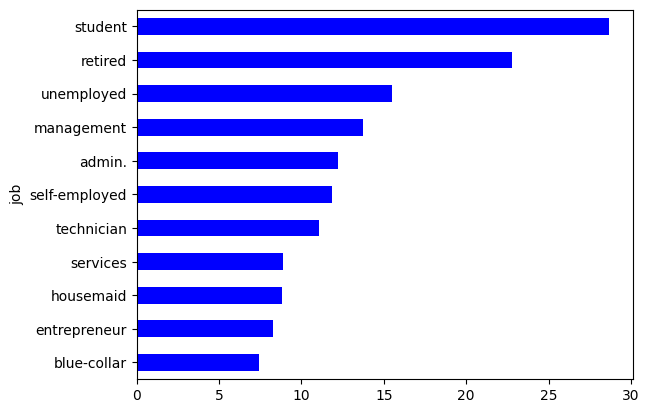

In [ ]:
(df.groupby("job")['target'].mean()*100).sort_values().plot(kind='barh',color="blue")


<Axes: ylabel='job'>

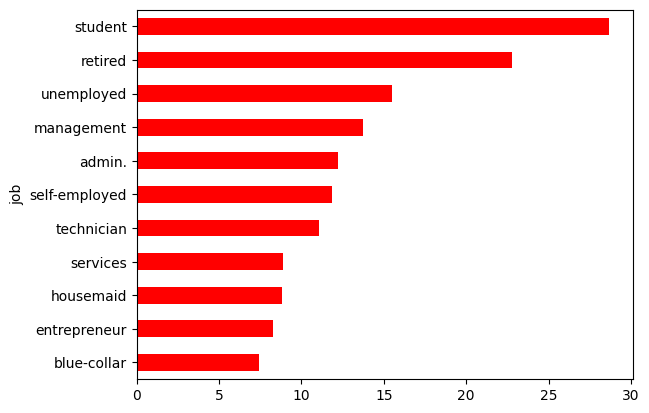

In [ ]:
(df.groupby("job")["target"].mean()*100).sort_values().plot(kind='barh',color="red")

<Axes: ylabel='education_qual'>

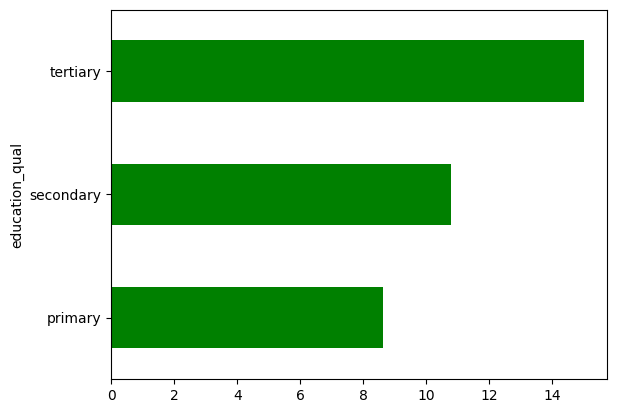

In [ ]:
(df.groupby("education_qual")['target'].mean()*100).sort_values().plot(kind='barh',color = "green")

<Axes: ylabel='call_type'>

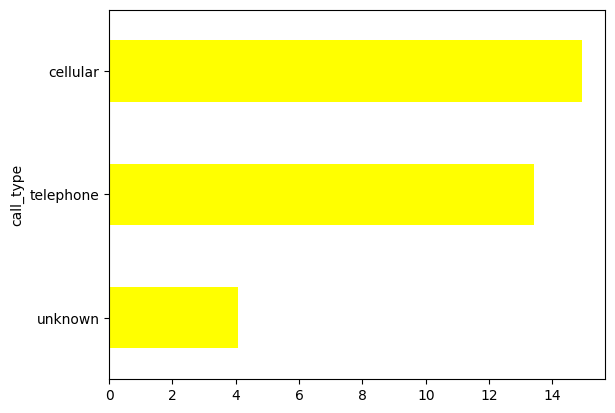

In [ ]:
(df.groupby("call_type")['target'].mean()*100).sort_values().plot(kind='barh',color="yellow")

<Axes: ylabel='day'>

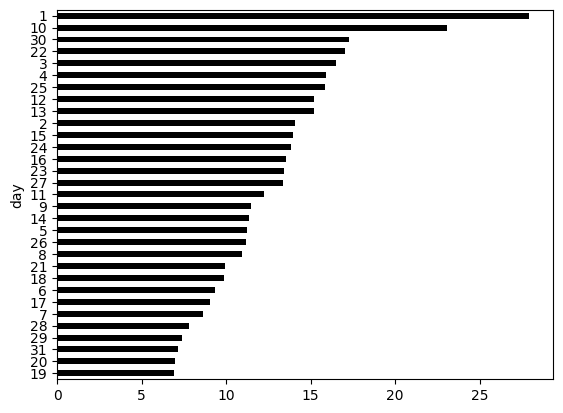

In [ ]:
(df.groupby("day")['target'].mean()*100).sort_values().plot(kind="barh",color="black")

<Axes: ylabel='mon'>

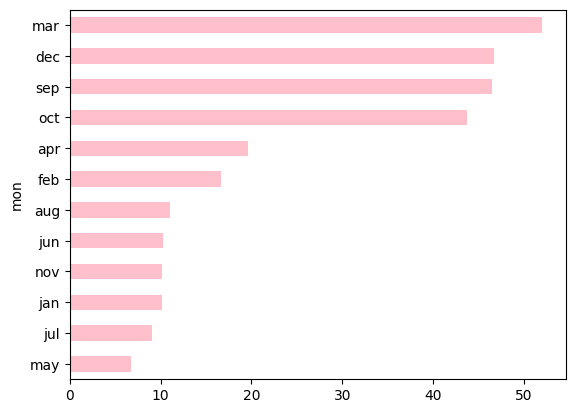

In [ ]:
(df.groupby("mon")['target'].mean()*100).sort_values().plot(kind='barh',color = "pink")

<Axes: ylabel='prev_outcome'>

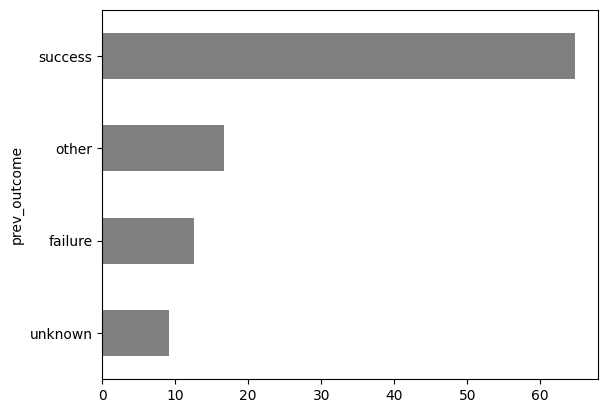

In [ ]:
(df.groupby("prev_outcome")['target'].mean()*100).sort_values().plot(kind='barh', color= "grey")

# **Data Encoding**

In [ ]:
df['job'] = df['job'].map({"blue-collar":0,"management":1,"technician":2,"admin.":3,"services":4,"retired":5,"self-employed":6,"entrepreneur":7,"unemployed":8,"housemaid":9,"student":10})

In [ ]:
df["marital"]= df['marital'].map({"divorced":0,"single":1,"married":2})

In [ ]:
df["education_qual"] = df["education_qual"].map({"primary":0,"tertiary":1,"secondary":2})

In [ ]:
df["call_type"] = df["call_type"].map({"telephone":0,"unknown":1,"cellular":2})

In [ ]:
df["mon"] = df["mon"].map({"dec":0,"mar":1,"sep":2,"oct":3,"jan":4,"feb":5,"apr":6,"nov":7,"jun":8,"aug":9,"jul":10,"may":11})

In [ ]:
df["prev_outcome"] = df["prev_outcome"].map({"success":0,"other":1,"failure":2,"unknown":3})

In [ ]:
df["mon"].value_counts()

11    13765
10     6894
9      6245
8      5339
7      3970
6      2932
5      2649
4      1403
3       738
2       579
1       477
0       214
Name: mon, dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [ ]:
df.isnull().sum()                                       #Checking for null values after completing data encoding

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

# **Splitting the Data**

In [ ]:
col =[*df.columns]
col[:-2]

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

In [ ]:
col[-1]

'target'

In [ ]:
x = df.loc[:,col[:-2]].values

In [ ]:
y = df.loc[:,col[-1]].values

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest, ytrain,ytest = train_test_split(x,y,test_size = 0.25)

# **Scaling the Features**

In [ ]:
df.shape

(45205, 12)

In [ ]:
len(xtrain), len(ytrain)                     #Splitting the data 0.75 for training and 0.25 for testing

(33903, 33903)

In [ ]:
len(xtest),len(ytest)

(11302, 11302)



*   Balance only the train data

*   Here with the combination of undersampling and oversampling,Balancing the data

*   SMOTEENN is the most famous approach for both undersampling and oversampling the data  




In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
S = SMOTEENN(sampling_strategy="all")
x_s,y_s = S.fit_resample(xtrain,ytrain)

In [ ]:
len(x_s),len(y_s)

(51043, 51043)

In [ ]:
df.isnull().sum()         #Cheking again for null values after applying SMOTEENN method

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [ ]:
df_Bal = pd.DataFrame(x_s, columns = df.columns[:-2])

In [ ]:
df_Bal['y'] = y_s

In [ ]:
len(df_Bal[df_Bal['y']==1])/len